In this project I will focus on controversy about Fandangos movie ratings which was shown in this article:
https://fivethirtyeight.com/features/fandango-movies-ratings/


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import *

In [68]:
all_sites_scores = pd.read_csv('all_sites_scores.csv')
fandango = pd.read_csv('fandango_scrape.csv')

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

In [69]:
all_sites_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


`fandango_scrape.csv` contains every film pulled from Fandango


In [70]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


Now let's explore if popularity fo the film affect's number of votes


<Axes: xlabel='RATING', ylabel='VOTES'>

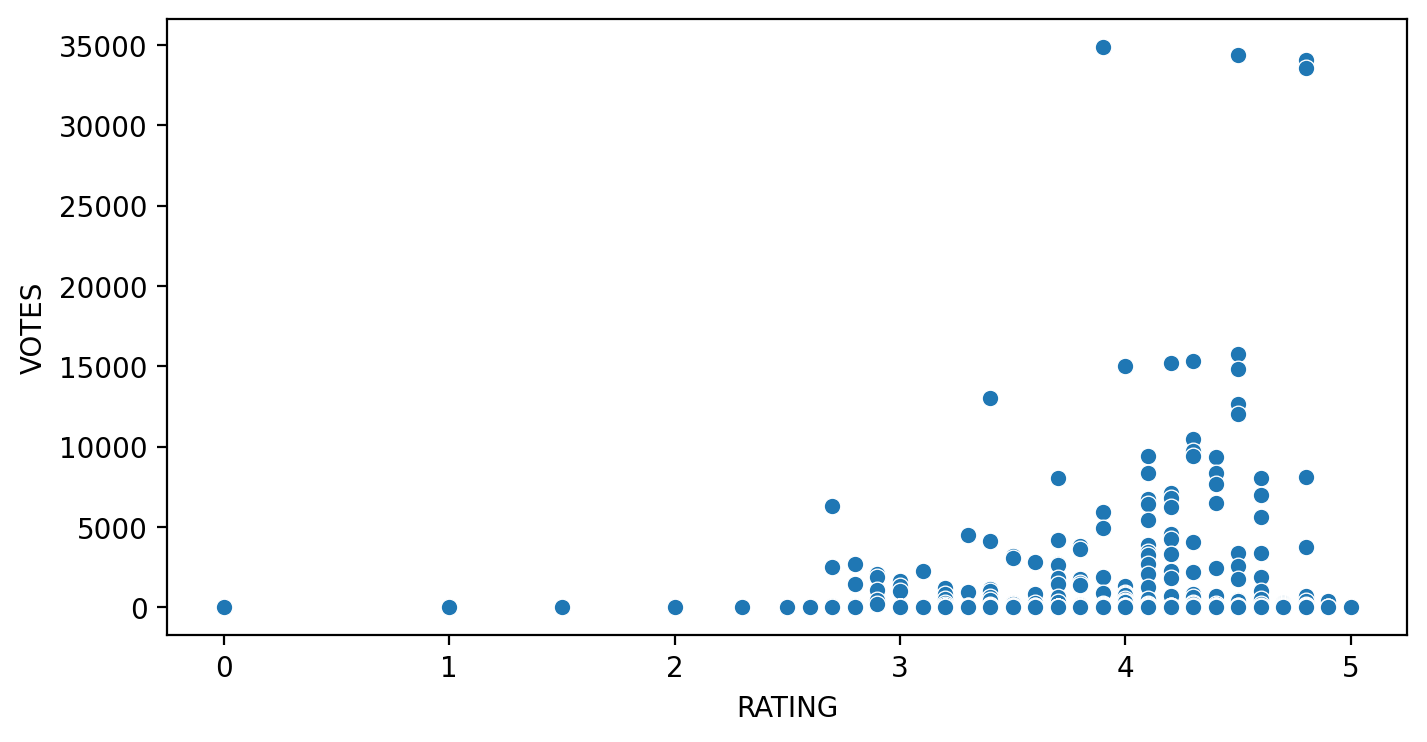

In [71]:
plt.figure(figsize=(8,4), dpi =200)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

We can see that number of votes is in correlation with movies popularity

In [72]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Let's create a database in which we have film from fandago that have at least 1 vote


In [73]:
fandango_reviewed = fandango[fandango['VOTES']>0]

Now let's see how does number of stars which is shown to the user of Fandango correlate to rating of the film which isn't shown.


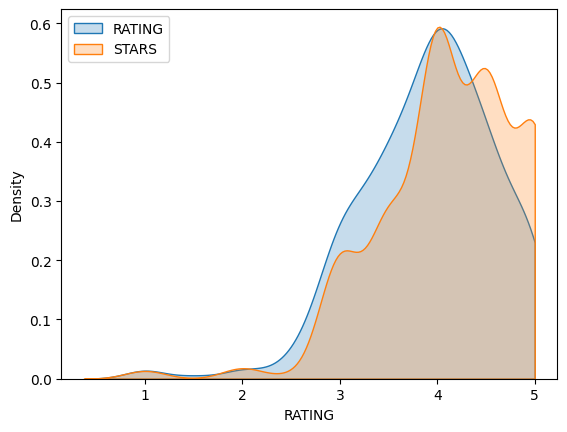

In [74]:
sns.kdeplot(data = fandango_reviewed,x='RATING', clip=(0,5),fill=True,label='RATING')
sns.kdeplot(data = fandango_reviewed,x='STARS', clip=(0,5),fill=True,label='STARS')
plt.legend()

We can see that number of stars is a little bit off to the right compared to the rating but this could be a rounding issue. For example if a rating of 4.3 is rounded to 4.5 stars it would be normal to see this shift in data, so we should investigate it further.

Let's see how many times does number of stars isn't equal to movie rating and by how much 

C:\Users\ulbry\AppData\Local\Temp\ipykernel_22860\580251838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_reviewed['STARS_DIFF'] = fandango_reviewed['STARS']-fandango_reviewed['RATING']
C:\Users\ulbry\AppData\Local\Temp\ipykernel_22860\580251838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_reviewed['STARS_DIFF'] = fandango_reviewed['STARS_DIFF'].round(2)


<Axes: xlabel='STARS_DIFF', ylabel='count'>

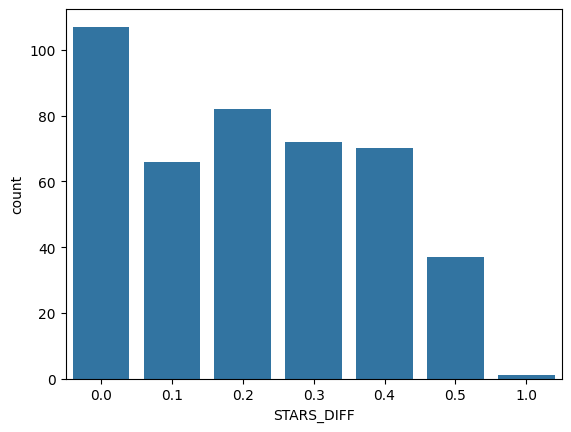

In [75]:
fandango_reviewed['STARS_DIFF'] = fandango_reviewed['STARS']-fandango_reviewed['RATING']
fandango_reviewed['STARS_DIFF'] = fandango_reviewed['STARS_DIFF'].round(2)
sns.countplot(data = fandango_reviewed, x='STARS_DIFF')

We can see that one movie has a diffrence of 1 beetween number of stars and it's rating


In [76]:
fandango_reviewed[fandango_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,1.0


The movie with the biggest diffrence in rating and number of stars is "Turbo Kid" from 2015 

Now let's compare the ratings on diffrent sites to the rating and number of stars on Fandango.

In [77]:
all_ratings = pd.merge(fandango_reviewed,all_sites_scores,how='inner',on='FILM')
all_ratings.head()

,FILM,STARS,RATING,VOTES,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1,25,42,46,3.2,4.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,0.0,71,81,59,7.0,7.3,1281,241807
2,American Sniper (2015),5.0,4.8,34085,0.2,72,85,72,6.6,7.4,850,251856
3,Furious 7 (2015),5.0,4.8,33538,0.2,81,84,67,6.8,7.4,764,207211
4,Inside Out (2015),4.5,4.5,15749,0.0,98,90,94,8.9,8.6,807,96252


Now, that we have all ratings in one place, let's normalize every rating so it's in 0-5 range so we can compare the data.


In [78]:
all_ratings['RottenTomatoes'] = np.round(all_ratings['RottenTomatoes']/20,1)
all_ratings['RottenTomatoes_User'] = np.round(all_ratings['RottenTomatoes_User']/20,1)
all_ratings['IMDB'] = np.round(all_ratings['IMDB']/2,1)

all_ratings['Metacritic'] = np.round(all_ratings['Metacritic']/20,1)
all_ratings['Metacritic_User'] = np.round(all_ratings['Metacritic_User']/2,1)

We can now compare the data


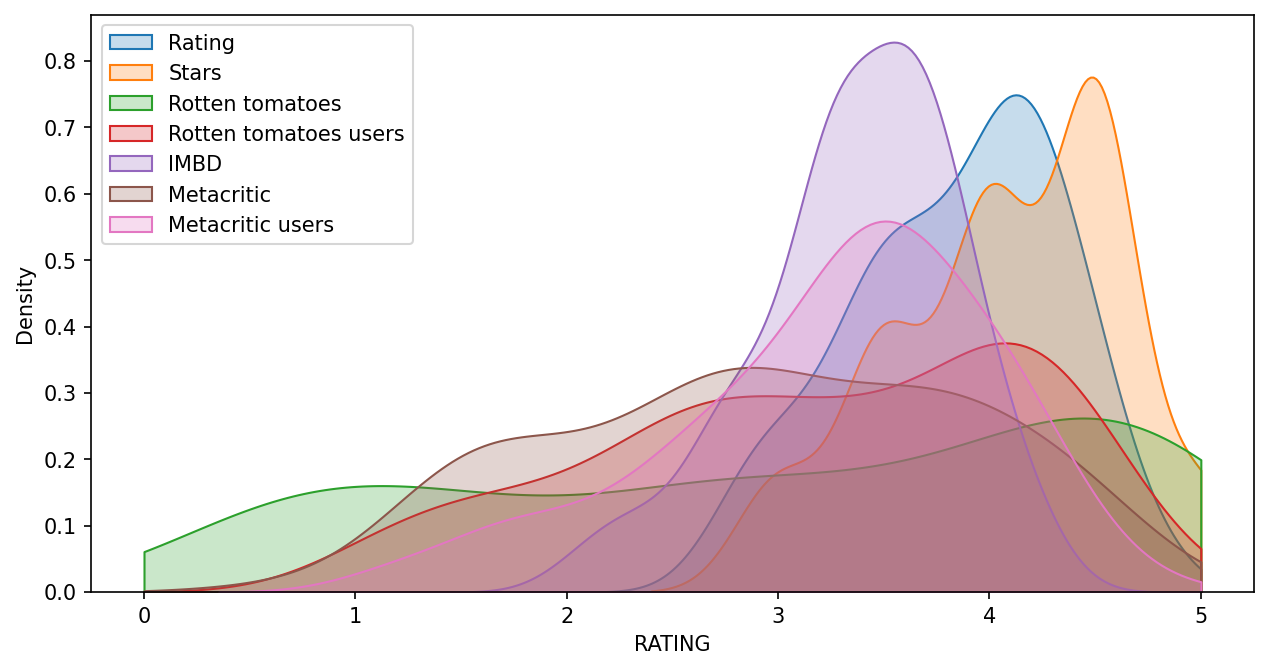

In [79]:
plt.figure(figsize=(10,5),dpi=150)
sns.kdeplot(data=all_ratings,x='RATING', fill = True,clip=(0,5),label='Rating')
sns.kdeplot(data=all_ratings,x='STARS', fill = True,clip=(0,5),label='Stars')
sns.kdeplot(data=all_ratings,x='RottenTomatoes', fill = True,clip=(0,5),label='Rotten tomatoes')
sns.kdeplot(data=all_ratings,x='RottenTomatoes_User', fill = True,clip=(0,5),label='Rotten tomatoes users')
sns.kdeplot(data=all_ratings,x='IMDB', fill = True,clip=(0,5),label='IMBD')
sns.kdeplot(data=all_ratings,x='Metacritic', fill = True,clip=(0,5),label='Metacritic')
sns.kdeplot(data=all_ratings,x='Metacritic_User', fill = True,clip=(0,5),label='Metacritic users')
plt.legend()

We can see that clearly ratings and number of stars on Fandago's are far from these on other sites. We can also notice that Fandago doesn't have any films that have a rating below the average score of 2,5. Now let's compare the rating on Fandago to rating on Rotten tomatoes


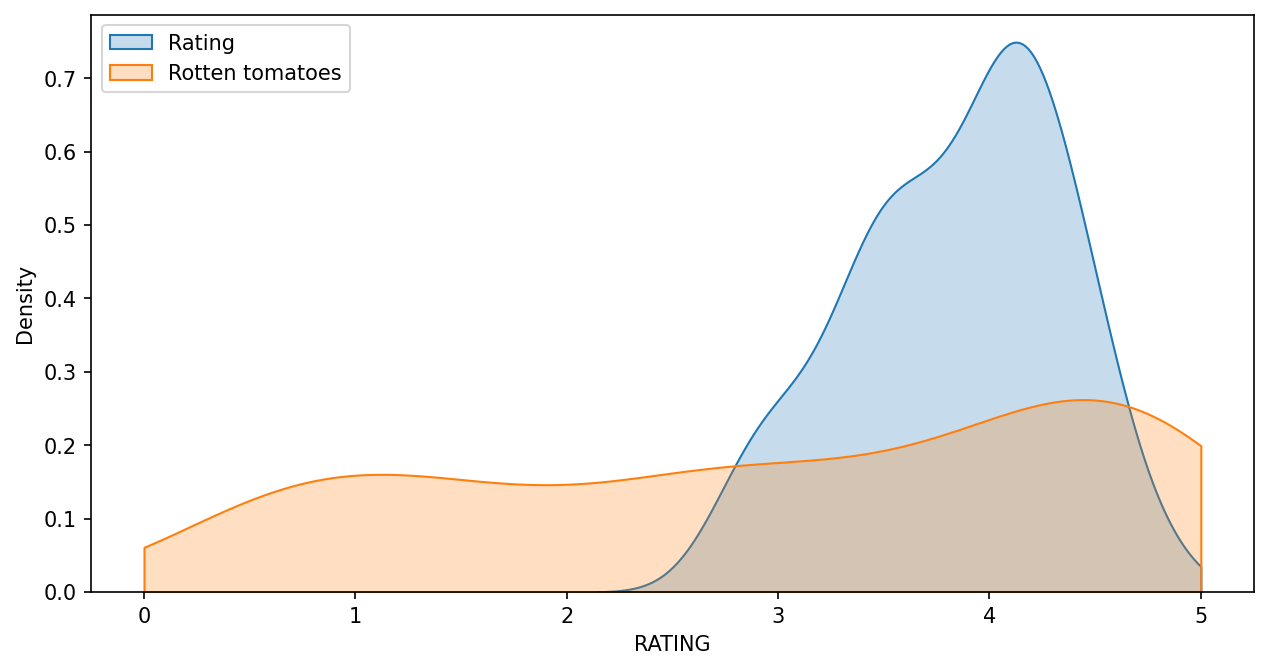

In [80]:
plt.figure(figsize=(10,5),dpi=150)
sns.kdeplot(data=all_ratings,x='RATING', fill = True,clip=(0,5),label='Rating')
sns.kdeplot(data=all_ratings,x='RottenTomatoes', fill = True,clip=(0,5),label='Rotten tomatoes')
plt.legend()

We clearly see that on Rotten tomatoes there's basically the same number of good and bad films, where on Fandago there are only good films.

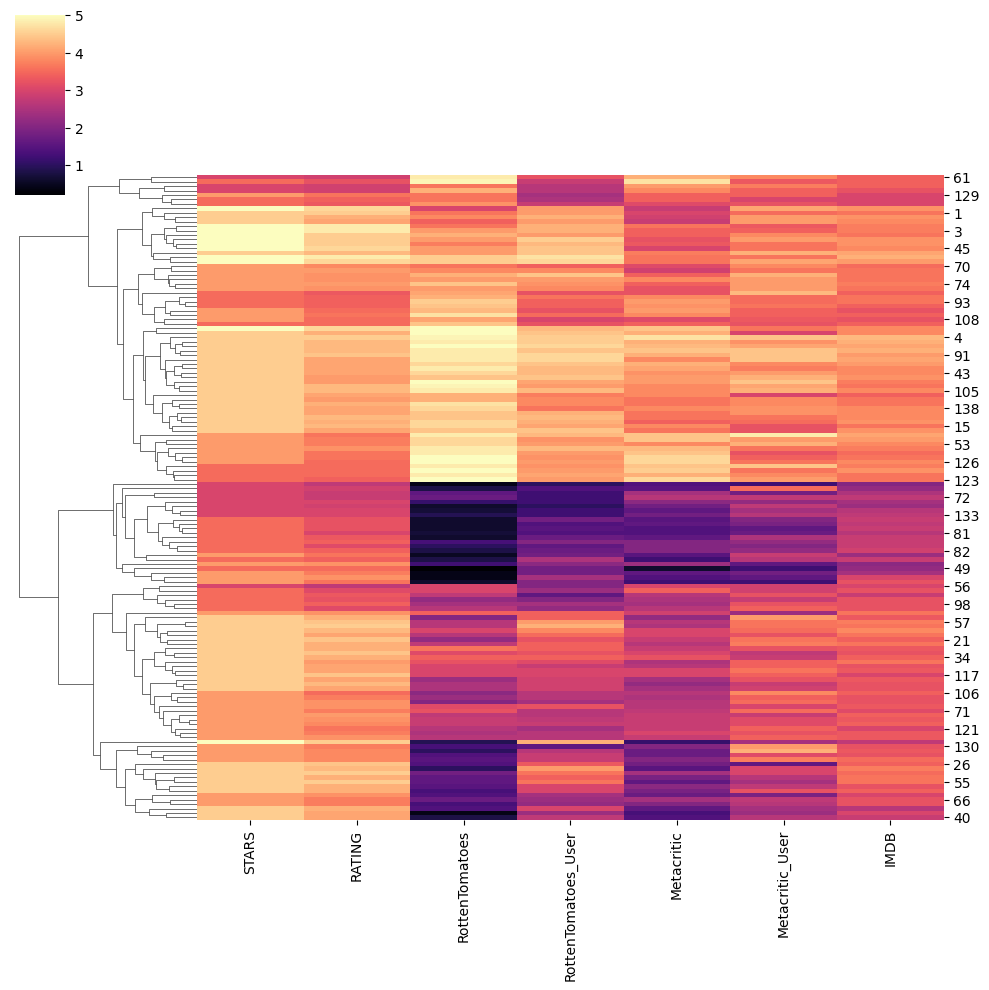

In [81]:
Normalised_ratings = all_ratings.drop('Metacritic_user_vote_count', axis=1)
Normalised_ratings = Normalised_ratings.drop('IMDB_user_vote_count', axis=1)
Normalised_ratings = Normalised_ratings.drop('FILM', axis=1)
Normalised_ratings = Normalised_ratings.drop('VOTES', axis=1)
Normalised_ratings = Normalised_ratings.drop('STARS_DIFF', axis=1)

sns.clustermap(Normalised_ratings,cmap='magma',col_cluster=False)

From that heatmap it's clear that while on other sites a film has a bad rating, on Fandago that movie has a good rating.



Final thoughts: Fandago shows a rating of 3-4 for films that are clearly bad! We can see that Fandago is articially making the rating higher than it should be.